In [ ]:
# 데이터 불러오기

In [ ]:
import pandas as pd

In [ ]:
d_1905 = pd.read_csv('/content/drive/Shareddrives/2021 CCP/천신만고 끝에 얻은 데이터/KT 데이터 재구성/coordinate_changed/201905KT.csv')
d_1905 = d_1905.drop(['Unnamed: 0'], axis=1)

In [ ]:
d_1905

,etl_ymd,id,x,y,timezn_cd,admi_cd,m00,m07,m10,m15,m20,m25,m30,m35,m40,m45,m50,m55,m60,m65,m70,m75,m80,m85,f00,f07,f10,f15,f20,f25,f30,f35,f40,f45,f50,f55,f60,f65,f70,f75,f80,f85,total
0,20190501,51764393,127.029783,37.581530,0,11230545,0.0,0.0,0.00,0.54,2.22,1.86,0.48,0.48,0.12,0.18,0.42,0.06,0.06,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.12,0.66,0.42,0.18,0.18,0.12,0.24,0.00,0.06,0.12,0.00,0.00,0.00,0.00,0.0,8.52
1,20190501,51764394,127.029778,37.581981,0,11230545,0.0,0.0,0.00,0.62,2.57,2.15,0.55,0.55,0.14,0.21,0.49,0.07,0.07,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.14,0.76,0.49,0.21,0.21,0.14,0.28,0.00,0.07,0.14,0.00,0.00,0.00,0.00,0.0,9.86
2,20190501,51764395,127.029772,37.582431,0,11230545,0.0,0.0,0.00,0.61,2.51,2.11,0.54,0.54,0.14,0.20,0.48,0.07,0.07,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.14,0.75,0.48,0.20,0.20,0.14,0.27,0.00,0.07,0.14,0.00,0.00,0.00,0.00,0.0,9.66
3,20190501,51764396,127.029766,37.582881,0,11230545,0.0,0.0,0.00,0.50,2.07,1.74,0.45,0.45,0.11,0.17,0.39,0.06,0.06,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.11,0.62,0.39,0.17,0.17,0.11,0.22,0.00,0.06,0.11,0.00,0.00,0.00,0.00,0.0,7.96
4,20190501,51776582,127.030349,37.581535,0,11230545,0.0,0.0,0.00,0.60,2.46,2.06,0.53,0.53,0.13,0.20,0.47,0.07,0.07,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.13,0.73,0.47,0.20,0.20,0.13,0.27,0.00,0.07,0.13,0.00,0.00,0.00,0.00,0.0,9.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595370,20190531,49728772,126.935629,37.554590,23,11440660,0.0,0.0,0.26,1.02,7.91,7.15,4.08,3.57,2.04,1.53,2.04,2.30,1.02,0.51,0.51,0.26,0.0,0.0,0.0,0.0,0.0,1.28,11.23,7.66,2.81,1.02,1.02,0.77,2.55,0.77,1.28,0.51,0.00,0.26,0.26,0.0,65.62
2595371,20190531,49728773,126.935622,37.555040,23,11440660,0.0,0.0,0.00,1.77,4.42,4.67,3.16,0.88,0.88,1.26,0.88,0.50,0.38,0.25,0.38,0.00,0.0,0.0,0.0,0.0,0.0,1.51,10.98,5.55,2.52,1.51,0.25,1.14,0.76,0.76,0.00,0.50,0.25,0.00,0.00,0.0,45.16
2595372,20190531,49728774,126.935616,37.555491,23,11440660,0.0,0.0,0.00,2.16,5.41,5.71,3.86,1.08,1.08,1.54,1.08,0.62,0.46,0.31,0.46,0.00,0.0,0.0,0.0,0.0,0.0,1.85,13.44,6.80,3.09,1.85,0.31,1.39,0.93,0.93,0.00,0.62,0.31,0.00,0.00,0.0,55.29
2595373,20190531,49740962,126.936188,37.555045,23,11440660,0.0,0.0,0.00,3.36,8.40,8.87,6.00,1.68,1.68,2.40,1.68,0.96,0.72,0.48,0.72,0.00,0.0,0.0,0.0,0.0,0.0,2.88,20.87,10.55,4.80,2.88,0.48,2.16,1.44,1.44,0.00,0.96,0.48,0.00,0.00,0.0,85.89


In [ ]:
#

In [ ]:
# 제기동 성+연령대별 인구수 파악

In [ ]:
d_1905_Jegi = d_1905[d_1905['admi_cd'] == 11230545]

In [ ]:
d_list = list(d_1905_Jegi)
d_list = d_list[6:-1]

In [ ]:
print(d_list)

['m00', 'm07', 'm10', 'm15', 'm20', 'm25', 'm30', 'm35', 'm40', 'm45', 'm50', 'm55', 'm60', 'm65', 'm70', 'm75', 'm80', 'm85', 'f00', 'f07', 'f10', 'f15', 'f20', 'f25', 'f30', 'f35', 'f40', 'f45', 'f50', 'f55', 'f60', 'f65', 'f70', 'f75', 'f80', 'f85']


In [ ]:
summ = d_1905_Jegi[d_list].sum().astype('int')

In [ ]:
summ

m00       745
m07     10992
m10     50089
m15    164112
m20    574727
m25    512785
m30    328927
m35    298525
m40    273528
m45    340920
m50    312936
m55    355556
m60    314863
m65    219136
m70    174569
m75    123490
m80     54912
m85     12454
f00      1155
f07     10859
f10     59974
f15    210702
f20    698693
f25    366730
f30    225739
f35    210684
f40    195296
f45    256056
f50    292588
f55    362070
f60    330338
f65    189045
f70    174220
f75     98008
f80     42390
f85     15232
dtype: int64

In [ ]:
#

In [ ]:
# 19년 5월 1일 제기동 0시의 셀별 유동인구수

In [ ]:
d_1905_Jegi = d_1905[d_1905['admi_cd'] == 11230545]

In [ ]:
d_190501 = d_1905_Jegi[d_1905_Jegi['etl_ymd'] == 20190501]

In [ ]:
d_190501_00 = d_190501[d_190501['timezn_cd'] == 0]

In [ ]:
!pip install geopandas
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [ ]:
# 경도 1도 = 88.8km (위도 37도 기준)
# 위도 1도 = 111km
# 경도 → 25/88800, 위도 → 25/111000

In [ ]:
x_ = 25/88800
y_ = 25/111000

d_for_map = d_190501_00.copy()
d_for_map['geometry'] = d_for_map.apply(lambda row : Polygon([(row['y']+y_,row['x']+x_),(row['y']+y_,row['x']-x_),(row['y']-y_,row['x']-x_),(row['y']-y_,row['x']+x_)]), axis=1)
d_for_map = gpd.GeoDataFrame(d_for_map, geometry='geometry')

d_190501_00['geometry'] = d_190501_00.apply(lambda row : Polygon([(row['x']+x_,row['y']+y_),(row['x']+x_,row['y']-y_),(row['x']-x_,row['y']-y_),(row['x']-x_,row['y']+y_)]), axis=1)
d_190501_00 = gpd.GeoDataFrame(d_190501_00, geometry='geometry')

In [ ]:
#d_190501_00['geometry'] = d_190501_00.apply(lambda row : Point([row['x'], row['y']]), axis=1)
#d_190501_00 = gpd.GeoDataFrame(d_190501_00, geometry='geometry')

In [ ]:
#d_for_map.to_csv("/content/drive/MyDrive/Colab Notebooks/2021CCP/kt_data/1905KT_Jegi.csv", mode='w')

In [ ]:
!pip install mapclassify
import mapclassify as mc

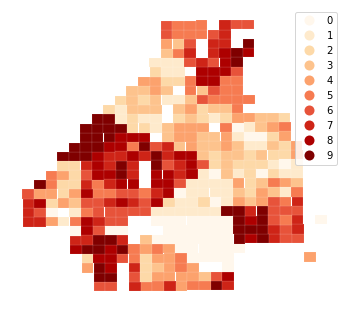

In [ ]:
import matplotlib.pyplot as plt
c10 = mc.Quantiles(d_190501_00['total'], k=10)
f, ax = plt.subplots(1, figsize=(6, 6))
d_190501_00.assign(cl=c10.yb).plot(column='cl', categorical=True, \
        k=10, cmap='OrRd', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [ ]:
# https://rightstone032.tistory.com/10?category=943722

In [ ]:
k = [list(d_for_map.geometry.exterior[row_id].coords) for row_id in range(d_for_map.shape[0])]

In [ ]:
import folium

m = folium.Map(location=[37.583772, 127.037004], zoom_start=15)

for i in range(len(d_for_map)):
  folium.Polygon(locations = k[i],fill = True,tooltip = d_for_map['id'][i]).add_to(m)
  #folium.Marker([d_for_map['y'][i],d_for_map['x'][i]],tooltip=d_for_map['id'][i]).add_to(m)

m

In [ ]:
#m.save('/content/drive/MyDrive/Colab Notebooks/2021CCP/kt_data/gridmap.html')

In [ ]:
# https://krksap.tistory.com/1751
# https://yobro.tistory.com/200

In [ ]:
# 그리드 + 카페 위치

In [ ]:
cafe = pd.read_excel('/content/drive/Shareddrives/2021 CCP/회의록 및 관련자료/11월/11 14/제기동 카페.xlsx')

for a in range(len(cafe)):
  folium.Marker([cafe['x'][a], cafe['y'][a]], tooltip=cafe['상호명'][a]).add_to(m)

In [ ]:
m

In [ ]:
# 카페가 포함된 그리드 확인

In [ ]:
cafe['geometry'] = cafe.apply(lambda row : Point([row['x'], row['y']]), axis=1)
cafe = gpd.GeoDataFrame(cafe, geometry='geometry')

In [ ]:
for i in range(len(d_for_map)):
  for j in range(len(cafe)):  # len(cafe) = 40
    if d_for_map.geometry[i].contains(cafe.geometry[j]):
      print('cell', i, 'includes cafe', j)

cell 7 includes cafe 23
cell 18 includes cafe 24
cell 68 includes cafe 17
cell 98 includes cafe 26
cell 99 includes cafe 25
cell 123 includes cafe 38
cell 127 includes cafe 33
cell 134 includes cafe 27
cell 143 includes cafe 14
cell 150 includes cafe 30
cell 152 includes cafe 28
cell 152 includes cafe 29
cell 165 includes cafe 10
cell 165 includes cafe 11
cell 169 includes cafe 32
cell 191 includes cafe 2
cell 201 includes cafe 31
cell 219 includes cafe 5
cell 234 includes cafe 39
cell 245 includes cafe 6
cell 247 includes cafe 3
cell 282 includes cafe 34
cell 299 includes cafe 4
cell 353 includes cafe 0
cell 357 includes cafe 35
cell 361 includes cafe 37


In [ ]:
d_for_map['have_cafe'] = False
for i in range(len(d_for_map)):
  for j in range(len(cafe)):
    if d_for_map.geometry[i].contains(cafe.geometry[j]):
      d_for_map['have_cafe'][i] = True

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
